#Price Prediction Using RNN

###The aim is to predict Tesla’s stock prices for the next 20 days based on historical data. RNNs are particularly good at handling time-series data, like stock prices, because they can remember past information.”

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split



# 1. Load the dataset
df = pd.read_csv('/content/tesla.csv')  # Ensure the dataset has 'Date' and 'Close' columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

###We convert the ‘Date’ column to datetime format, which makes it easier to work with time-based data. After that, we normalize the 'Close' prices using MinMaxScaler, scaling the values between 0 and 1

In [2]:
# 2. Preprocess the data (normalize)
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [3]:
# 3. Create sequences for the RNN
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

In [4]:
# 4. Split the data into train and test sets
split_index = int(len(X) * 0.8)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# 5. Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer for predicting the stock price

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# 6. Train the model on the training set
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 7. Predict for the next 20 days
# Use the last 60 days from the training set to predict the next 20 days
predictions = []
input_sequence = scaled_data[split_index - sequence_length:split_index]

for _ in range(20):  # Predict for the next 20 days
    input_sequence = np.reshape(input_sequence, (1, sequence_length, 1))  # Ensure correct shape for RNN
    predicted_price = model.predict(input_sequence)

    predictions.append(predicted_price[0][0])  # Save predicted price

    # Reshape the predicted price to match input shape (1, 1, 1)
    predicted_price = np.reshape(predicted_price, (1, 1, 1))

    # Shift the input_sequence and append the predicted price
    input_sequence = np.append(input_sequence[:, 1:, :], predicted_price, axis=1)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - loss: 0.1327 - val_loss: 0.0045
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 0.0015 - val_loss: 6.3765e-04
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.5013e-04 - val_loss: 6.9276e-04
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.9100e-04 - val_loss: 6.0571e-04
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.9538e-04 - val_loss: 6.0094e-04
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8839e-04 - val_loss: 6.7526e-04
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2456e-04 - val_loss: 5.9327e-04
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.7707e-04 - val_loss: 5.8086e-04
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3057e-04 - val_loss: 5.9298e-04
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7752e-04 - val_loss: 6.5187e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1

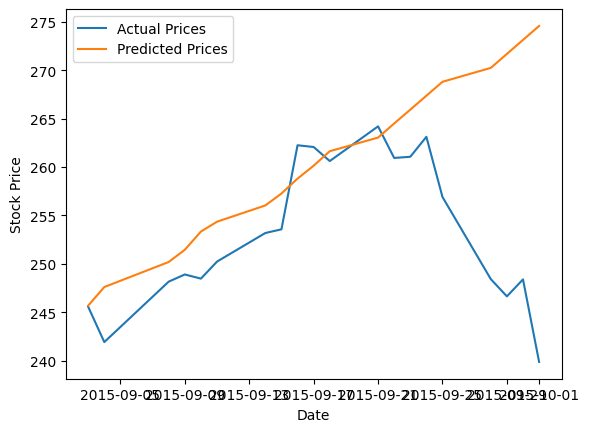

Day 1: Actual: 245.570007, Predicted: 245.69488525390625
Day 2: Actual: 241.929993, Predicted: 247.6123809814453
Day 3: Actual: 248.169998, Predicted: 250.1974639892578
Day 4: Actual: 248.910004, Predicted: 251.45779418945312
Day 5: Actual: 248.479996, Predicted: 253.3410186767578
Day 6: Actual: 250.240005, Predicted: 254.3577117919922
Day 7: Actual: 253.190002, Predicted: 256.03515625
Day 8: Actual: 253.570007, Predicted: 257.2676696777344
Day 9: Actual: 262.25, Predicted: 258.8057861328125
Day 10: Actual: 262.070007, Predicted: 260.1394348144531
Day 11: Actual: 260.619995, Predicted: 261.6352844238281
Day 12: Actual: 264.200012, Predicted: 263.0435485839844
Day 13: Actual: 260.940002, Predicted: 264.4986267089844
Day 14: Actual: 261.059998, Predicted: 265.9242248535156
Day 15: Actual: 263.119995, Predicted: 267.3634033203125
Day 16: Actual: 256.910004, Predicted: 268.8017883300781
Day 17: Actual: 248.429993, Predicted: 270.23858642578125
Day 18: Actual: 246.649994, Predicted: 271.683

In [6]:
# 8. Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 9. Compare with the actual prices
actual_prices = scaler.inverse_transform(scaled_data[split_index:split_index+20])

# 10. Plot the results
plt.plot(df.index[split_index:split_index+20], actual_prices, label='Actual Prices')
plt.plot(df.index[split_index:split_index+20], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print actual and predicted prices for the next 20 days
for i in range(20):
    print(f"Day {i+1}: Actual: {actual_prices[i][0]}, Predicted: {predicted_prices[i][0]}")
